In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#craeting dataframe of the csv file which contains tweets of users and label
df = pd.read_csv('train.csv')
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [3]:
#to check null values if any in the dataframe
df.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [4]:
#filtering positive tweets(without abusive words) i.e. tweets with label 0
df[df['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
#filtering negative tweets(with abusive words) i.e. tweets with label 1
df[df['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


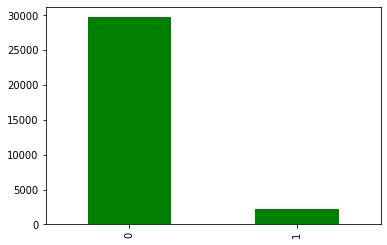

In [6]:
#plotting frequency of data with abusive and non abusive words
df['label'].value_counts().plot.bar(color = 'green', figsize = (6, 4))

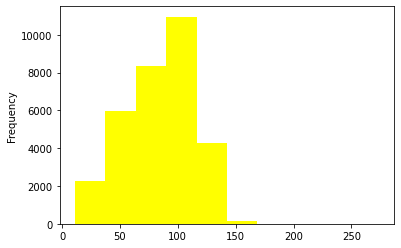

In [7]:
#plotting length of the comments by .len() function
length_train = df['tweet'].str.len().plot.hist(color = 'yellow', figsize = (6, 4))

In [8]:
#adding another column to store length of the tweets
df['len'] = df['tweet'].str.len()
df.head()

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [9]:
#calculating mean count standard deviation maximum minimum using the describe function
df.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

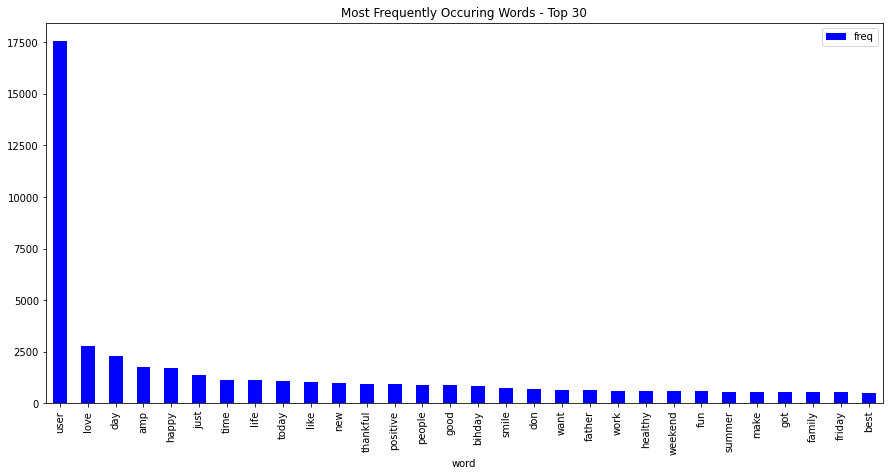

In [10]:
#calculating and plotting the top 30 frequently occuring words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

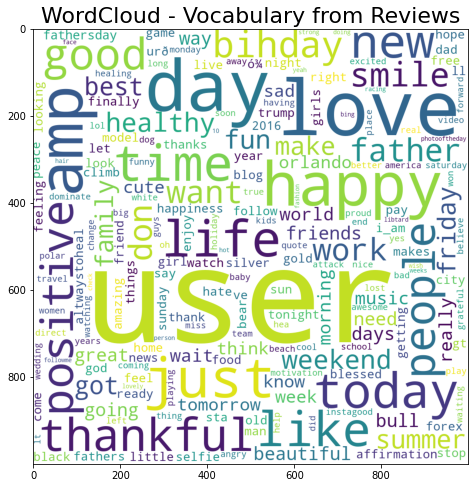

In [11]:
#using wordcloud library to visualize most used words according to the kength of the text in the plot. for eg. "user"
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [12]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


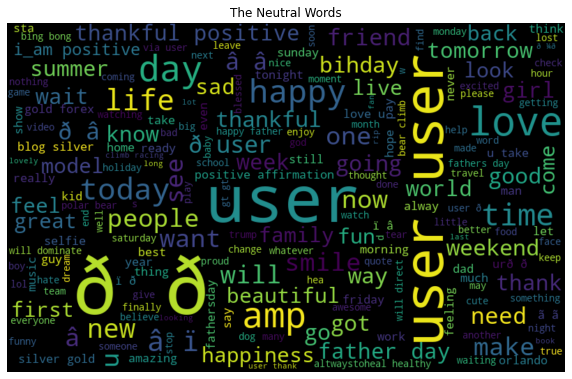

In [13]:
#by filtering the label by value 0 which contains non abusive words and plotting the frequency using wordcloud library
normal_words =' '.join([text for text in df['tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

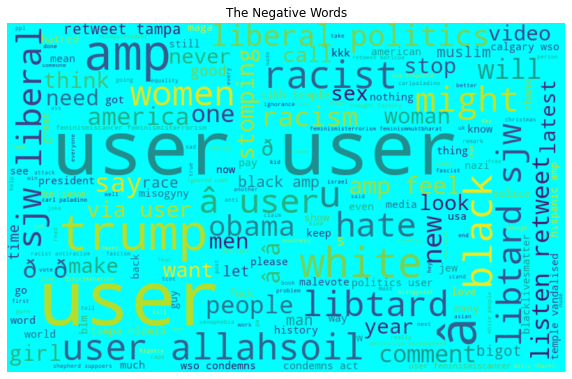

In [14]:
#by filtering the label by value 1 which contains abusive words and plotting the frequency using wordcloud library
negative_words =' '.join([text for text in df['tweet'][df['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [15]:
#function to store hashtags occuring in the tweets.
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [16]:
import re

In [17]:
# extracting hashtags from non abusive/racist/sexist tweets

HT_regular = hashtag_extract(df['tweet'][df['label'] == 0])

# extracting hashtags from abusive/racist/sexist tweets
HT_negative = hashtag_extract(df['tweet'][df['label'] == 1])

HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [18]:
import nltk

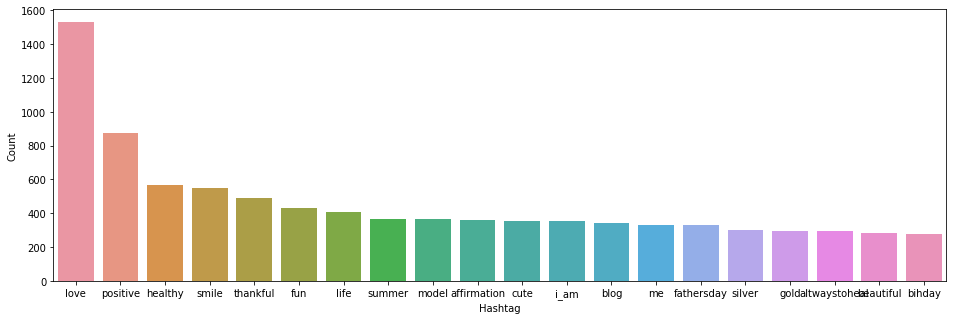

In [19]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags in the non-abusive tweets  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

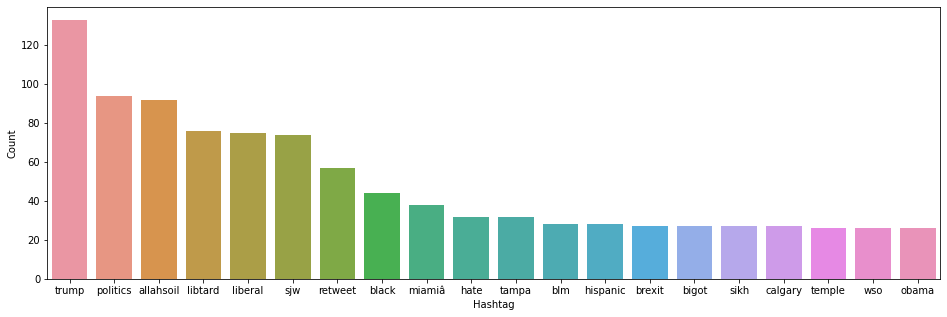

In [20]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags in the abusive tweets   
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [21]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    #The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). 
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [22]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import vaderSentiment

In [24]:
#VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of three categories:
#negative, neutral, positive
#compound (computed by normalizing the scores above
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()

In [25]:
df['profanity_degree'] = df['tweet'].apply(calculate_sentiment)

In [26]:
#calculating profanity degree for non abusive tweets
df.sort_values(by='profanity_degree', ascending=False)[:10]

,id,label,tweet,len,profanity_degree
10535,10536,0,"love is love is love is love, and love celebra...",106,0.9897
22502,22503,0,"three awards for our play ""only my love can la...",134,0.9837
6722,6723,0,enjoy! #weekend #enjoy #good #times #joy #s...,108,0.9831
11415,11416,0,"have a great weekend, friends. #pay #fun #gr...",106,0.9816
21143,21144,0,love you...!!! ððð #friend #friends #...,104,0.9812
18848,18849,0,with true love you can win one person with tru...,131,0.9796
20232,20233,0,@user today is my #bihday :) ! c'est mon #ann...,121,0.9796
6689,6690,0,happy best friends day!!! #pbcrave #bff #best...,116,0.9783
25868,25869,0,i love having such amazing friends @user thank...,120,0.9779
14913,14914,0,father's day# i am extremely blessed to have...,117,0.9778


In [27]:
#calculating profanity degree for abusive tweets. most abusive tweets has highest values with negative sign(-)
df.sort_values(by='profanity_degree', ascending=True)[:10]

,id,label,tweet,len,profanity_degree
10427,10428,0,father lying through his ass. #terrorism #homo...,104,-0.9774
18497,18498,1,"content: #abuse, #pedophilia, #stalking, #hara...",133,-0.9756
10518,10519,0,what a terrible week in news. #jocox murder is...,128,-0.9752
27771,27772,0,#alone #depressed #depression #selfharm #sui...,108,-0.9741
23011,23012,0,i hate how i used to be hungry to travel the w...,137,-0.9740
30290,30291,1,@user @user why do we have listen to a woman w...,118,-0.9735
1586,1587,1,"if talking about makes racism worst, with tha...",124,-0.9702
29688,29689,0,big girl cryð­.. #socialanxiety #selfharming...,109,-0.9652
2784,2785,1,happy newyear! #sameshitnewyear #corruption #t...,132,-0.9652
17754,17755,0,shadows ð»ð #socialanxiety #selfharming ...,112,-0.9652
